In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import codecs
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
from scipy import integrate
%matplotlib inline

In [2]:
data_dir = "時系列/20220921 5HB/30/vis/*.txt"
result_dir = "result/" + "/".join(data_dir.split("時系列")[1].split("/")[1:-1]) + "/"
result_file_name = "_".join(data_dir.split("時系列")[1].split("/")[1:-1])
paths = [p for p in glob.glob(data_dir)]
# 積分範囲の定義
integral_region = [400, 550]
x_1 = 1/(integral_region[0]*(10**(-7)))
x_2 = 1/(integral_region[1]*(10**(-7)))
result_dict = {}

apply_abs = lambda x: abs(x)

In [11]:
for path in paths:
    # ファイル名  ex: -60 445.時系列
    file_name = path.split("/")[-1].split(".")[0]
    with codecs.open(path, "r", "UTF-8", "ignore") as file:
        col_names = ["c{0:02d}".format(i) for i in range(5)]
        df = pd.read_table(file, names=col_names)
        df = df.rename(
            columns={"c00": "wavelength", "c01": "photon count"}
        )
        df = df.drop(["c02", "c03", "c04"], axis=1)
#         波数のカラムを作る
        df["wavenumber"] = 1/((df["wavelength"])*(10**(-7)))
#         積分範囲の部分を取り出す
        df_target = df[df["wavenumber"] < x_1]
        df_target = df_target[df["wavenumber"] > x_2]
        x = df_target["wavenumber"]
        y = df_target["photon count"]
        integral_result = integrate.trapz(y, x)
        result_dict.update({file_name : integral_result})

        
result_df = pd.DataFrame.from_dict(result_dict, orient="index")
result_df = result_df.rename(
            columns={0: "light intensity"}
        )
result_df['light intensity'] = result_df['light intensity'].map(apply_abs)
result_df.sort_values("light intensity", ascending=False)

os.makedirs(result_dir, exist_ok=True)
result_df.to_csv(result_dir + result_file_name + ".csv", index=True)

<ipython-input-11-e441181466fb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target = df_target[df["wavenumber"] > x_2]
<ipython-input-11-e441181466fb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target = df_target[df["wavenumber"] > x_2]
<ipython-input-11-e441181466fb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target = df_target[df["wavenumber"] > x_2]
<ipython-input-11-e441181466fb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target = df_target[df["wavenumber"] > x_2]
<ipython-input-11-e441181466fb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target = df_target[df["wavenumber"] > x_2]
<ipython-input-11-e441181466fb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target = df_target[df["wavenumber"] > x_2]


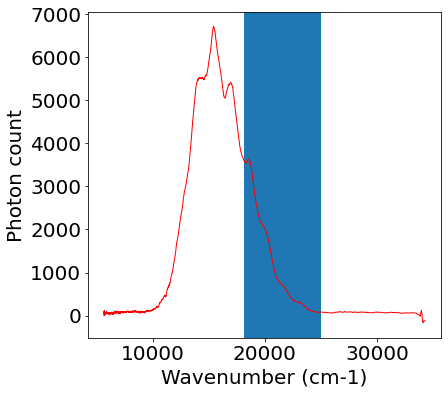

In [4]:
# 積分範囲のグラフ
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Photon count')
fig.subplots_adjust(left=0.2)
ax.plot(df["wavenumber"], df["photon count"], color="red", lw='1')

ax.axvspan(x_1, x_2)

In [13]:
# concat/のデータを用いてkp1, kp2, kt1, kt2を算出する
fit_data_dir = "result" + data_dir.split("vis")[0].split('時系列')[1] + "fit_result/concat/"
fit_data = "result" + data_dir.split("vis")[0].split('時系列')[1] + "fit_result/concat/result_df.csv"

# 可視光強度のラベルが同じ順番か確認
df_fit_data = pd.read_csv(fit_data)
print(df_fit_data, result_df)

  Unnamed: 0     opt_B     opt_C     opt_D       k_1       k_2  sorted_order
0    001 490  0.015424 -0.716724 -0.043687  0.043687 -0.018239             0
1    010 490  0.013868 -0.748472 -0.040560  0.040560 -0.017362             1
2    011 490  0.008673 -0.561652 -0.020752  0.020752 -0.007463             2
3    100 490  0.036512 -0.118288 -0.015391  0.015391 -0.001628             3
4    101 490  0.038674  0.038706 -0.010508  0.010508  0.000423             4
5    110 490  0.054242  0.519227 -0.006962  0.006962  0.007518             5      light intensity
001     1.572385e+08
010     1.066097e+08
011     4.887421e+07
100     2.549008e+07
101     1.176934e+07
110     8.132725e+06


In [17]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.set_xlabel('light intensity')
ax.set_ylabel('Kinetic parameters')
fig.subplots_adjust(left=0.2)
# ax.plot(df["wavenumber"], df["photon count"], color="red", lw='1')

# ax.axvspan(x_1, x_2)

'result/20220921 5HB/30/'

In [10]:
fit_data_dir

'時系列/20220921 5HB/30/fit_result'

In [19]:
df_fit_data

,Unnamed: 0,opt_B,opt_C,opt_D,k_1,k_2,sorted_order
0,001 490,0.015424,-0.716724,-0.043687,0.043687,-0.018239,0
1,010 490,0.013868,-0.748472,-0.040560,0.040560,-0.017362,1
2,011 490,0.008673,-0.561652,-0.020752,0.020752,-0.007463,2
3,100 490,0.036512,-0.118288,-0.015391,0.015391,-0.001628,3
4,101 490,0.038674,0.038706,-0.010508,0.010508,0.000423,4
5,110 490,0.054242,0.519227,-0.006962,0.006962,0.007518,5


In [26]:
result_df = result_df.rename(
            columns={0: "light intensity"}
        )

In [4]:
result_df.sort_values("light intensity")

,light intensity
001,-1.572385e+08
010,-1.066097e+08
011,-4.887421e+07
100,-2.549008e+07
101,-1.176934e+07
110,-8.132725e+06


In [7]:
result_df['light intensity'] = result_df['light intensity'].map(apply_abs)

In [8]:
result_df

,light intensity
001,1.572385e+08
010,1.066097e+08
011,4.887421e+07
100,2.549008e+07
101,1.176934e+07
110,8.132725e+06


In [10]:
result_df.sort_values("light intensity", ascending=False)

,light intensity
001,1.572385e+08
010,1.066097e+08
011,4.887421e+07
100,2.549008e+07
101,1.176934e+07
110,8.132725e+06
